#**TOPIC: HANDWRITTEN DIGITS RECOGNITION USING NEURAL NETWORK**



```
This notebook has been divided into the following sections:

1. Importing libraries

2. Loading the dataset

3. Data Visualization
    3.1 Images
    3.2 Distribution of Train data
    3.3 Distribution of Test data

4. Data Pre-processing
    4.1 Conversion to 32 bit float
    4.2 Normalization
    4.3 One-hot Encoding

5. Defining Model  
    5.1 Flatten Layer
    5.2 Activation Function
    5.3 Activation Layer
    5.4 Fully Connected Layer
    5.5 Softmax Layer

6. Traning at LR = 0.1, 0.5, .01, 0.001

7. Prediction

8. Evaluation
```



#**1. Importing Libraries**

In [ ]:
import numpy as np                        #Python library used for working with arrays
import matplotlib.pyplot as plt           #visualizaton library for plotting graphs
from keras.utils import np_utils          #converts categorical data to an array of labeled data
from keras.datasets import mnist          #downloads MNIST library
import pandas as pd                       #for data manipulation and analysis

#**2. Loading the dataset**
##**Dataset Used: MNIST database (Modified National Institute of Standards and Technology database)**

* X_train / y_train_1 => will be used for training the model
* X_test => will be used for predicting the output
* y_test_1 => will be used for evaluating the output
* X_train and X_test contains images
* y_train_1 and y_test_1 contains labels 

In [ ]:
(x_train_1, y_train_1), (x_test_1, y_test_1) = mnist.load_data()

print("\nShape of x_train_1: ", x_train_1.shape)
print("\nShape of y_train_1: ", y_train_1.shape)
print("\nShape of x_test_1: ", x_test_1.shape)
print("\nShape of y_test_1: ", y_test_1.shape)


Shape of x_train_1:  (60000, 28, 28)

Shape of y_train_1:  (60000,)

Shape of x_test_1:  (10000, 28, 28)

Shape of y_test_1:  (10000,)


#**3. Data Visualization**

##**3.1 Images**

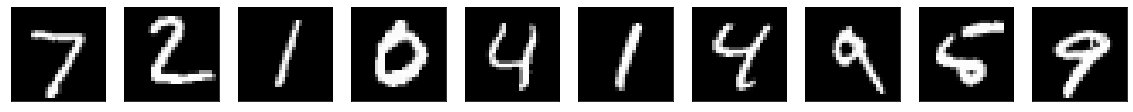

In [ ]:
import matplotlib.pyplot as plt
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_1[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
plt.close()

##**3.2 Distribution of Training data**

In [ ]:
print("Number of training sample per digit are:\n",pd.Series(y_train_1).value_counts())

print("\n\nPercentage of each Train class is:\n")
digit_rate_train = pd.Series(y_train_1).value_counts() / 10000
digit_rate_train

Number of training sample per digit are:
 1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
dtype: int64


Percentage of each Train class is:



1    0.6742
7    0.6265
3    0.6131
2    0.5958
9    0.5949
0    0.5923
6    0.5918
8    0.5851
4    0.5842
5    0.5421
dtype: float64

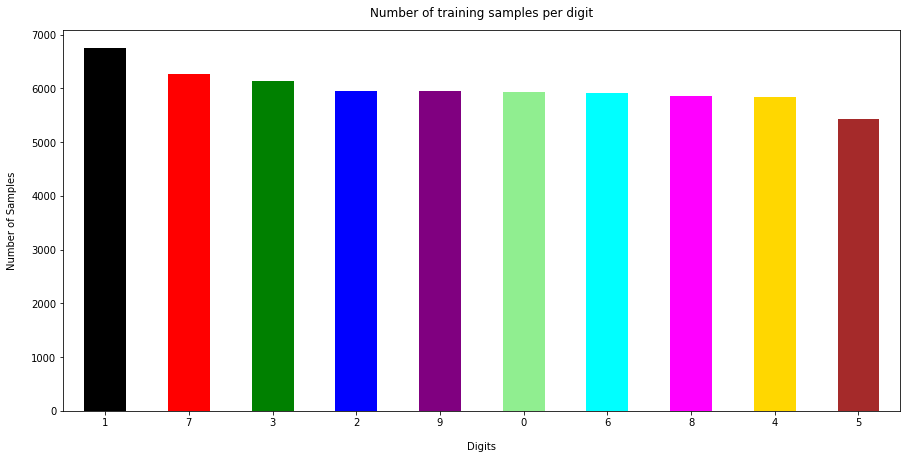

In [ ]:
pd.Series(y_train_1).value_counts().plot(kind='bar', figsize=(15, 7), rot=0, color=['black', 'red', 'green', 'blue', 'purple', 'lightgreen', 'cyan', 'magenta', 'gold', 'brown'])
plt.xlabel("Digits", labelpad=14)
plt.ylabel("Number of Samples", labelpad=14)
plt.title("Number of training samples per digit", y=1.02);

##**3.3 Distribution of Test data**

In [ ]:
print("Number of test sample per digit are:\n",pd.Series(y_test_1).value_counts())

print("\n\nPercentage of each Test class is:\n")
digit_rate_test = pd.Series(y_test_1).value_counts() / 10000
digit_rate_test

Number of test sample per digit are:
 1    1135
2    1032
7    1028
3    1010
9    1009
4     982
0     980
8     974
6     958
5     892
dtype: int64


Percentage of each Test class is:



1    0.1135
2    0.1032
7    0.1028
3    0.1010
9    0.1009
4    0.0982
0    0.0980
8    0.0974
6    0.0958
5    0.0892
dtype: float64

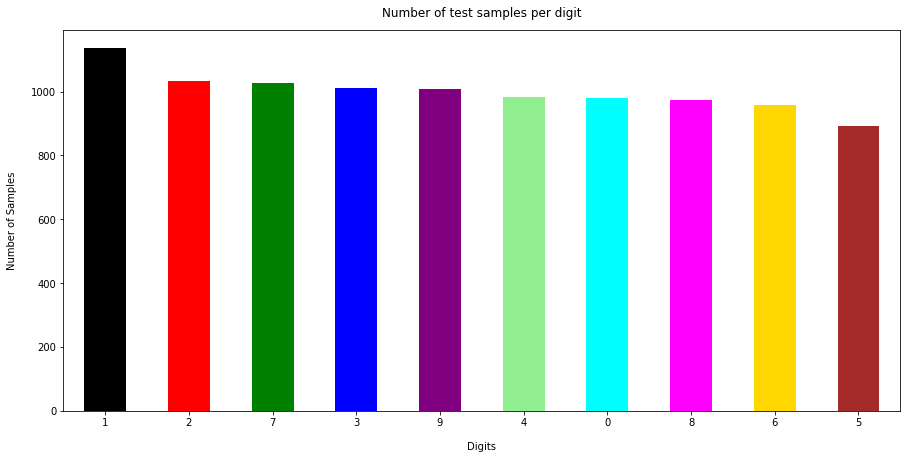

In [ ]:
pd.Series(y_test_1).value_counts().plot(kind='bar', figsize=(15, 7), rot=0, color=['black', 'red', 'green', 'blue', 'purple', 'lightgreen', 'cyan', 'magenta', 'gold', 'brown'])
plt.xlabel("Digits", labelpad=14)
plt.ylabel("Number of Samples", labelpad=14)
plt.title("Number of test samples per digit", y=1.02);

#**4. Data Pre-processing** (Normalized)

In [ ]:
#Converting the image arrays into 32 bit float precision
#Significance: Training time reduces for smaller dataset  

x_train_1 = x_train_1.astype('float32')
x_test_1 = x_test_1.astype('float32')


#NORMALIZATION
#Significance:
    # Normalizing the data generally speeds up learning and leads to faster convergence.
    # The CNN model converges faster on data whose mean is close to zero than on data with a larger range like [0 to 255].
    # As the pixel values range from 0 to 255, dividing all the values by 255 will convert it to range from 0 to 1.

x_train_1 = x_train_1/255
x_test_1 = x_test_1/255


#ONE HOT ENCODING
#Significance: Encoding categorical data to numbers helps in using them for training and evaluating the model.

y_train_1 = np_utils.to_categorical(y_train_1)
y_test_1 = np_utils.to_categorical(y_test_1)

#Creating a mini batch for a faster training
x_train_1 = x_train_1[0:1000]
y_train_1 = y_train_1[0:1000]

#**5. Defining the Network**

##**5.1 Flatten Layer**

* Significance:
  
  * Used for falttening the input.
  * It converts the data into a 1-dimensional array for inputting it to the next layer.

In [ ]:
class FlattenLayer:
    def __init__(self, input_shape):
        self.input_shape = input_shape

    def forward(self, input):
        return np.reshape(input, (1, -1))
    
    def backward(self, output_error, learning_rate):
        return np.reshape(output_error, self.input_shape)

##**5.2 Activation Functions**

* Significance:

  * It introduces non-linearity in the network to learn more complex features.

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_prime(x):
    return np.exp(-x) / (1 + np.exp(-x))**2

def tanh(x):
    return np.tanh(x)

def tanh_prime(x):
    return 1 - np.tanh(x)**2

def relu(x):
    return np.maximum(x, 0)

def relu_prime(x):
    return np.array(x >= 0).astype('int')

##**5.3 Activation Layer**

* Significance:
  
  *  It decides whether the neuron should be activated or not.
  * An activated neuron contributes in determining the output. 

In [ ]:
class ActivationLayer:
    def __init__(self, activation, activation_prime):
        self.activation = activation
        self.activation_prime = activation_prime
    
    def forward(self, input):
        self.input = input
        return self.activation(input)
    
    def backward(self, output_error, learning_rate):
        return output_error * self.activation_prime(self.input)

##**5.4 Fully-connected Layer**

* Significance:

  * Fully connected neural networks (FCNNs) are a type of artificial neural network where the architecture is such that all the nodes, or neurons, in one layer are connected to the neurons in the next layer.

  * The major advantage of fully connected networks is that they are “structure agnostic” i.e. there are no special assumptions needed to be made about the input.

In [ ]:
class FCLayer:
    def __init__(self, input_size, output_size):
        self.input_size = input_size
        self.output_size = output_size
        self.weights = np.random.randn(input_size, output_size) / np.sqrt(input_size + output_size)
        self.bias = np.random.randn(1, output_size) / np.sqrt(input_size + output_size)

    def forward(self, input):
        self.input = input
        return np.dot(input, self.weights) + self.bias

    def backward(self, output_error, learning_rate):
        input_error = np.dot(output_error, self.weights.T)
        weights_error = np.dot(self.input.T, output_error)
        
        self.weights -= learning_rate * weights_error
        self.bias -= learning_rate * output_error
        return input_error

##**5.5 Softmax Layer**

* Significance: 

* The softmax function is a function that turns a vector of K real values into a vector of K real values that sum to 1

* It assigns decimal probabilities to each class in a multi-class classification problem.

In [ ]:
class SoftmaxLayer:
    def __init__(self, input_size):
        self.input_size = input_size
    
    def forward(self, input):
        self.input = input
        tmp = np.exp(input)
        self.output = tmp / np.sum(tmp)
        return self.output
    
    def backward(self, output_error, learning_rate):
        input_error = np.zeros(output_error.shape)
        out = np.tile(self.output.T, self.input_size)
        return self.output * np.dot(output_error, np.identity(self.input_size) - out)

In [ ]:
#Passing parameter value

network = [
    FlattenLayer(input_shape=(28, 28)),
    FCLayer(28 * 28, 128),
    ActivationLayer(relu, relu_prime),
    FCLayer(128, 10),
    SoftmaxLayer(10)
]

###**Significance of Learning Rates:**

  * It is a hyper-parameter in an optimization algorithm that determines the step size at each iteration while moving toward a minimum of a loss function

##**5.6.1 Training at LR = 0.1**

In [ ]:
def mse(y_true, y_pred):
    return np.mean(np.power(y_true - y_pred, 2))

def mse_prime(y_true, y_pred):
    return 2 * (y_pred - y_true) / y_pred.size

def sse(y_true, y_pred):
    return 0.5 * np.sum(np.power(y_true - y_pred, 2))

def sse_prime(y_true, y_pred):
    return y_pred - y_true

In [ ]:
epochs = 50
learning_rate = 0.1
error_list=[]

# training
for epoch in range(epochs):
    error = 0
    for x, y_true in zip(x_train_1, y_train_1):
        # forward
        output = x
        for layer in network:
            output = layer.forward(output)
        
        # error (display purpose only)
        error += mse(y_true, output)

        # backward
        output_error = mse_prime(y_true, output)
        for layer in reversed(network):
            output_error = layer.backward(output_error, learning_rate)
    
    error /= len(x_train_1)
    error_list.append(error)
    print('%d/%d, error=%f' % (epoch + 1, epochs, error))

1/50, error=0.070175
2/50, error=0.032675
3/50, error=0.021838
4/50, error=0.017142
5/50, error=0.014007
6/50, error=0.011747
7/50, error=0.010029
8/50, error=0.008682
9/50, error=0.007560
10/50, error=0.006632
11/50, error=0.005837
12/50, error=0.005119
13/50, error=0.004599
14/50, error=0.004179
15/50, error=0.003839
16/50, error=0.003556
17/50, error=0.003315
18/50, error=0.003108
19/50, error=0.002929
20/50, error=0.002770
21/50, error=0.002629
22/50, error=0.002499
23/50, error=0.002375
24/50, error=0.002250
25/50, error=0.002138
26/50, error=0.002044
27/50, error=0.001943
28/50, error=0.001858
29/50, error=0.001788
30/50, error=0.001733
31/50, error=0.001689
32/50, error=0.001652
33/50, error=0.001610
34/50, error=0.001542
35/50, error=0.001456
36/50, error=0.001369
37/50, error=0.001331
38/50, error=0.001311
39/50, error=0.001293
40/50, error=0.001279
41/50, error=0.001266
42/50, error=0.001255
43/50, error=0.001244
44/50, error=0.001235
45/50, error=0.001227
46/50, error=0.0012

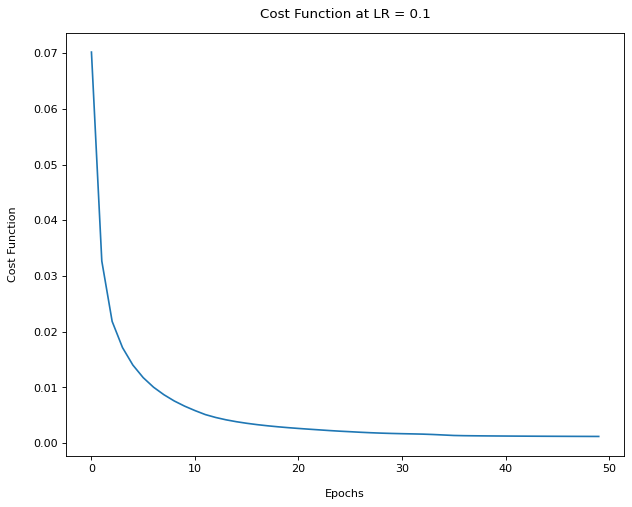

In [ ]:
from matplotlib.pyplot import figure

figure(figsize=(9, 7), dpi=80)
plt.plot(np.arange(len(error_list)), error_list)
plt.xlabel("Epochs", labelpad=14)
plt.ylabel("Cost Function", labelpad=14)
plt.title("Cost Function at LR = 0.1", y=1.02);

#**5.6.2 Training at LR = 0.5**

In [ ]:
network = [
    FlattenLayer(input_shape=(28, 28)),
    FCLayer(28 * 28, 128),
    ActivationLayer(relu, relu_prime),
    FCLayer(128, 10),
    SoftmaxLayer(10)
]

epochs = 50
learning_rate = 0.5
error_list=[]

# training
for epoch in range(epochs):
    error = 0
    for x, y_true in zip(x_train_1, y_train_1):
        # forward
        output = x
        for layer in network:
            output = layer.forward(output)
        
        # error (display purpose only)
        error += mse(y_true, output)

        # backward
        output_error = mse_prime(y_true, output)
        for layer in reversed(network):
            output_error = layer.backward(output_error, learning_rate)
    
    error /= len(x_train_1)
    error_list.append(error)
    print('%d/%d, error=%f' % (epoch + 1, epochs, error))

1/50, error=0.043947
2/50, error=0.021131
3/50, error=0.014215
4/50, error=0.009772
5/50, error=0.006745
6/50, error=0.005633
7/50, error=0.004030
8/50, error=0.003375
9/50, error=0.002791
10/50, error=0.002451
11/50, error=0.002308
12/50, error=0.002187
13/50, error=0.001993
14/50, error=0.001994
15/50, error=0.001752
16/50, error=0.001865
17/50, error=0.001525
18/50, error=0.001493
19/50, error=0.001490
20/50, error=0.001475
21/50, error=0.001189
22/50, error=0.001115
23/50, error=0.001152
24/50, error=0.001101
25/50, error=0.001146
26/50, error=0.001154
27/50, error=0.001157
28/50, error=0.001125
29/50, error=0.001098
30/50, error=0.001143
31/50, error=0.001135
32/50, error=0.001130
33/50, error=0.001129
34/50, error=0.001119
35/50, error=0.001120
36/50, error=0.001101
37/50, error=0.001095
38/50, error=0.001014
39/50, error=0.001021
40/50, error=0.001037
41/50, error=0.001002
42/50, error=0.000866
43/50, error=0.000787
44/50, error=0.000719
45/50, error=0.000696
46/50, error=0.0006

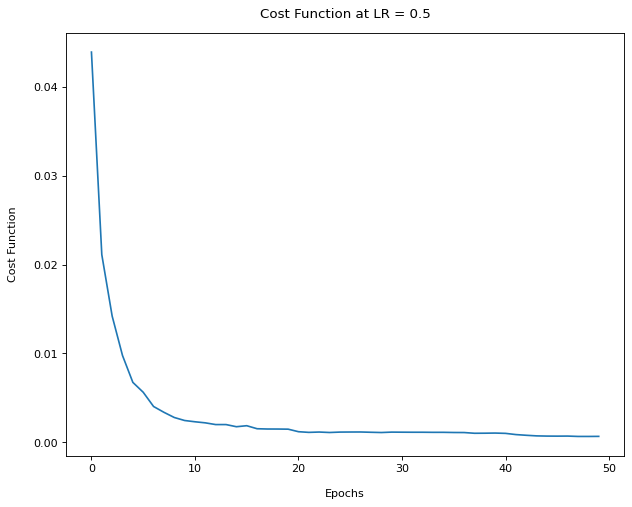

In [ ]:
from matplotlib.pyplot import figure

figure(figsize=(9, 7), dpi=80)
plt.plot(np.arange(len(error_list)), error_list)
plt.xlabel("Epochs", labelpad=14)
plt.ylabel("Cost Function", labelpad=14)
plt.title("Cost Function at LR = 0.5", y=1.02);

##**5.6.3 Training at LR = 0.01**

In [ ]:
network = [
    FlattenLayer(input_shape=(28, 28)),
    FCLayer(28 * 28, 128),
    ActivationLayer(relu, relu_prime),
    FCLayer(128, 10),
    SoftmaxLayer(10)
]

epochs = 50
learning_rate = 0.01
error_list=[]

# training
for epoch in range(epochs):
    error = 0
    for x, y_true in zip(x_train_1, y_train_1):
        # forward
        output = x
        for layer in network:
            output = layer.forward(output)
        
        # error (display purpose only)
        error += mse(y_true, output)

        # backward
        output_error = mse_prime(y_true, output)
        for layer in reversed(network):
            output_error = layer.backward(output_error, learning_rate)
    
    error /= len(x_train_1)
    error_list.append(error)
    print('%d/%d, error=%f' % (epoch + 1, epochs, error))

1/50, error=0.089555
2/50, error=0.087117
3/50, error=0.084158
4/50, error=0.080166
5/50, error=0.074913
6/50, error=0.068807
7/50, error=0.062526
8/50, error=0.056552
9/50, error=0.051194
10/50, error=0.046642
11/50, error=0.042821
12/50, error=0.039540
13/50, error=0.036668
14/50, error=0.034085
15/50, error=0.031767
16/50, error=0.029739
17/50, error=0.027978
18/50, error=0.026443
19/50, error=0.025098
20/50, error=0.023908
21/50, error=0.022845
22/50, error=0.021888
23/50, error=0.021021
24/50, error=0.020230
25/50, error=0.019505
26/50, error=0.018837
27/50, error=0.018219
28/50, error=0.017646
29/50, error=0.017111
30/50, error=0.016612
31/50, error=0.016144
32/50, error=0.015705
33/50, error=0.015292
34/50, error=0.014902
35/50, error=0.014533
36/50, error=0.014184
37/50, error=0.013853
38/50, error=0.013538
39/50, error=0.013236
40/50, error=0.012949
41/50, error=0.012675
42/50, error=0.012412
43/50, error=0.012160
44/50, error=0.011918
45/50, error=0.011685
46/50, error=0.0114

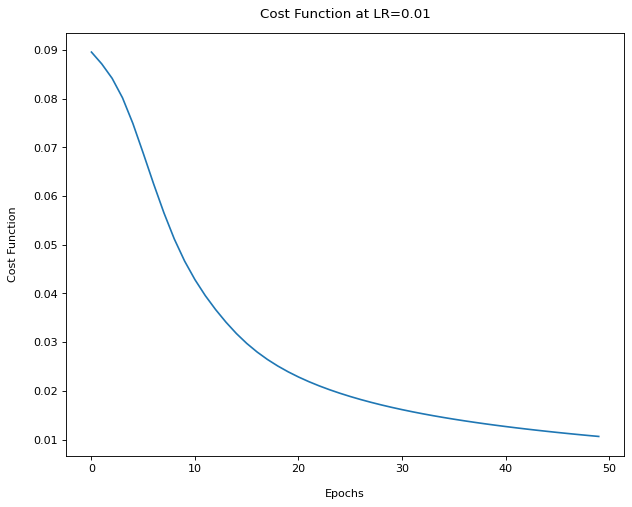

In [ ]:
from matplotlib.pyplot import figure

figure(figsize=(9, 7), dpi=80)
plt.plot(np.arange(len(error_list)), error_list)
plt.xlabel("Epochs", labelpad=14)
plt.ylabel("Cost Function", labelpad=14)
plt.title("Cost Function at LR=0.01", y=1.02);

##**5.6.4 Training at LR = 0.001**

In [ ]:
network = [
    FlattenLayer(input_shape=(28, 28)),
    FCLayer(28 * 28, 128),
    ActivationLayer(relu, relu_prime),
    FCLayer(128, 10),
    SoftmaxLayer(10)
]

epochs = 50
learning_rate = 0.001
error_list=[]

# training
for epoch in range(epochs):
    error = 0
    for x, y_true in zip(x_train_1, y_train_1):
        # forward
        output = x
        for layer in network:
            output = layer.forward(output)
        
        # error (display purpose only)
        error += mse(y_true, output)

        # backward
        output_error = mse_prime(y_true, output)
        for layer in reversed(network):
            output_error = layer.backward(output_error, learning_rate)
    
    error /= len(x_train_1)
    error_list.append(error)
    print('%d/%d, error=%f' % (epoch + 1, epochs, error))

1/50, error=0.090660
2/50, error=0.090407
3/50, error=0.090160
4/50, error=0.089917
5/50, error=0.089677
6/50, error=0.089439
7/50, error=0.089201
8/50, error=0.088963
9/50, error=0.088721
10/50, error=0.088478
11/50, error=0.088232
12/50, error=0.087983
13/50, error=0.087730
14/50, error=0.087472
15/50, error=0.087209
16/50, error=0.086941
17/50, error=0.086666
18/50, error=0.086383
19/50, error=0.086092
20/50, error=0.085793
21/50, error=0.085485
22/50, error=0.085168
23/50, error=0.084840
24/50, error=0.084502
25/50, error=0.084152
26/50, error=0.083790
27/50, error=0.083414
28/50, error=0.083025
29/50, error=0.082623
30/50, error=0.082205
31/50, error=0.081772
32/50, error=0.081323
33/50, error=0.080858
34/50, error=0.080376
35/50, error=0.079877
36/50, error=0.079362
37/50, error=0.078831
38/50, error=0.078283
39/50, error=0.077717
40/50, error=0.077136
41/50, error=0.076541
42/50, error=0.075931
43/50, error=0.075307
44/50, error=0.074672
45/50, error=0.074022
46/50, error=0.0733

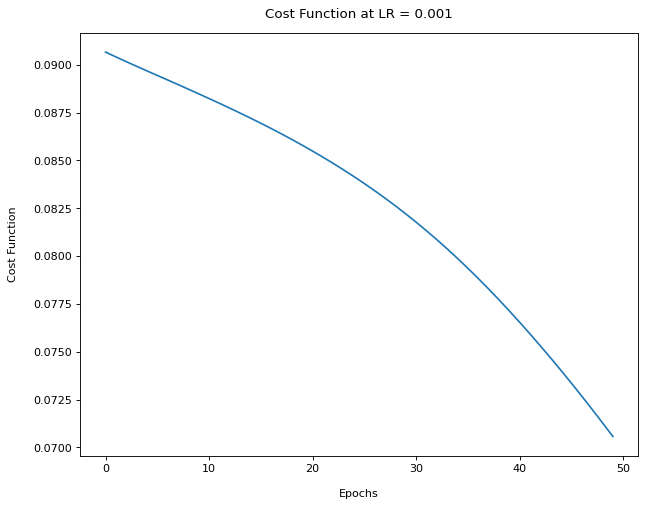

In [ ]:
from matplotlib.pyplot import figure

figure(figsize=(9, 7), dpi=80)
plt.plot(np.arange(len(error_list)), error_list)
plt.xlabel("Epochs", labelpad=14)
plt.ylabel("Cost Function", labelpad=14)
plt.title("Cost Function at LR = 0.001", y=1.02);

#**7. Prediction**

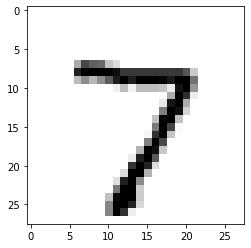

pred: 7, prob: 1.00, true: 7


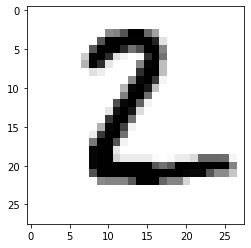

pred: 6, prob: 0.52, true: 2


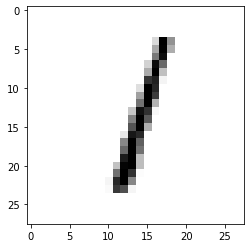

pred: 1, prob: 1.00, true: 1


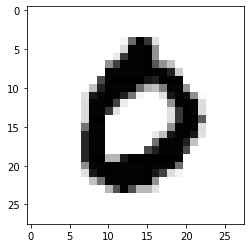

pred: 0, prob: 1.00, true: 0


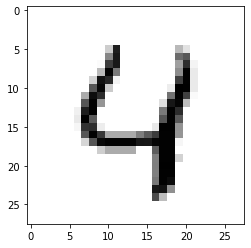

pred: 4, prob: 0.96, true: 4


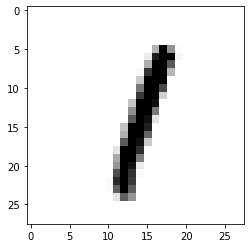

pred: 1, prob: 0.99, true: 1


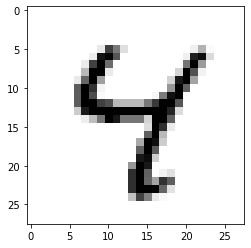

pred: 4, prob: 0.99, true: 4


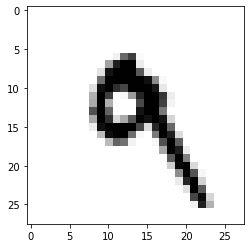

pred: 9, prob: 1.00, true: 9


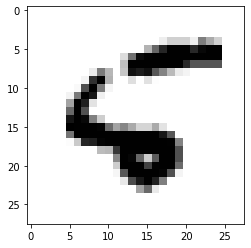

pred: 2, prob: 0.91, true: 5


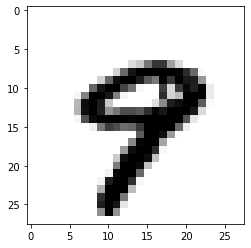

pred: 9, prob: 0.84, true: 9


In [ ]:
import matplotlib.pyplot as plt

samples = 10
for test, true in zip(x_test_1[:samples], y_test_1[:samples]):
    image = np.reshape(test, (28, 28))
    plt.imshow(image, cmap='binary')
    plt.show()
    pred = predict(network, test)[0]
    idx = np.argmax(pred)
    idx_true = np.argmax(true)
    print('pred: %s, prob: %.2f, true: %d' % (idx, pred[idx], idx_true))

#**8. Evaluation**

In [ ]:
def predict(network, input):
    output = input
    for layer in network:
        output = layer.forward(output)
    return output

ratio = sum([np.argmax(y) == np.argmax(predict(network, x)) for x, y in zip(x_test_1, y_test_1)]) / len(x_test_1)
error = sum([mse(y, predict(network, x)) for x, y in zip(x_test_1, y_test_1)]) / len(x_test_1)
print('ratio: %.2f' % ratio)
print('mse: %.4f' % error)

ratio: 0.87
mse: 0.0191
